In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime

pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 4000


In this notebook we will first go through the data and check what all preprocessing is required before training our model.
In the end we will combine all these steps into a single function which we can then reuse for other similar datasets

In [145]:
df = pd.read_csv('listings.csv')
df.head()

/home/addu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1947,https://www.airbnb.com/rooms/1947,20200423041458,2020-04-23,Furnished Gold Coast studio #806,Cozy studio apartment in vintage renovated co...,This is a perfect apartment and location for a...,Cozy studio apartment in vintage renovated co...,none,This location is so convenient. You can walk t...,The building office does not manage this apart...,You're steps away from the red line train and ...,Once you arrive it's like living in your own a...,I live in Indiana and don't always see my gues...,"This is a residential condo building, so I wou...",NaN,NaN,https://a0.muscache.com/im/pictures/40d375a8-5...,NaN,2153,https://www.airbnb.com/users/show/2153,Linda,2008-08-16,"Munster, Indiana, United States",I'm a former university administrator who saw ...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/3c130...,https://a0.muscache.com/im/pictures/user/3c130...,River North,4,4,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Chicago, IL, United States",Near North Side,Near North Side,NaN,Chicago,IL,60610,Chicago,"Chicago, IL",US,United States,41.90246,-87.63405,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$59.00,$500.00,NaN,$100.00,$0.00,1,$0.00,14,60,14,18,60,60,14.2,60.0,5 weeks ago,t,0,3,3,3,2020-04-23,4,2,2015-03-01,2020-03-29,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,R18000024411,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,7,7,0,0,0.06
1,2384,https://www.airbnb.com/rooms/2384,20200423041458,2020-04-23,"Hyde Park - Walk to UChicago, 10 min to McCormick",Visiting The University of Chicago or attendin...,"The private bedroom has a queen size bed, beds...",Visiting The University of Chicago or attendin...,none,My apartment is one block from beautiful Jacks...,The basement laundry room hours are 8:00am to ...,UNIVERSITY OF CHICAGO: Visiting academics and ...,You will have access to the entire apartment -...,I will greet you when you arrive and show you ...,1. Your booking is for ONE (1) person only - t...,NaN,NaN,https://a0.muscache.com/im/pictures/acf6b3c0-4...,NaN,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,"Chicago, Illinois, United States",My 2 bdrm apartment is a 2nd floor walk-up in ...,

In [146]:
drop_columns = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
 'space', 'description', 'experiences_offered', 'neighborhood_overview',
 'notes', 'transit', 'access', 'interaction', 'house_rules',
 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location','host_about',
 'host_thumbnail_url','host_picture_url','host_has_profile_pic','host_neighbourhood','host_verifications',
 'street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed',
 'city','state','zipcode','market','smart_location','country_code','country','latitude',
 'longitude','is_location_exact','calendar_updated','availability_30','availability_60',
 'availability_90','availability_365','calendar_last_scraped','jurisdiction_names','license',
 'first_review','last_review'
]

df = df.drop(columns=drop_columns, errors='ignore')

Lets check the size of the data and the null values present in each column

In [147]:
null_values = df.isnull().sum()
percentage_nulls = null_values/df.shape[0]*100

In [148]:
percentage_nulls

id                                                0.000000
thumbnail_url                                   100.000000
medium_url                                      100.000000
xl_picture_url                                  100.000000
host_since                                        0.000000
host_response_time                               12.946009
host_response_rate                               12.946009
host_acceptance_rate                              5.375587
host_is_superhost                                 0.000000
host_listings_count                               0.000000
host_total_listings_count                         0.000000
host_identity_verified                            0.000000
property_type                                     0.000000
room_type                                         0.000000
accommodates                                      0.000000
bathrooms                                         0.046948
bedrooms                                          0.0704

In [149]:
drop_columns = percentage_nulls[percentage_nulls > 50].index
drop_columns

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'square_feet',
       'weekly_price', 'monthly_price'],
      dtype='object')

So it seems that there are **8520** AirBnB hosts or to be more accurate properties in Chicago.
The columns above seems to contain data less than 50% so we them. 

In [150]:
df = df.drop(columns=drop_columns)

lets check the five point summary for the numerical columns

In [151]:
df

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1947,2008-08-16,within an hour,100%,100%,f,4,4,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$59.00,$100.00,$0.00,1,$0.00,14,60,14,18,60,60,14.2,60.0,t,4,2,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,f,f,moderate,f,f,7,7,0,0,0.06
1,2384,2008-08-29,within an hour,100%,100%,t,1,1,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Breakfast,""Free street parkin...",$55.00,$0.00,$20.00,1,$0.00,2,90,2,2,1125,1125,2.0,1125.0,t,178,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,f,strict_14_with_grace_period,f,f,1,0,1,0,2.76
2,4505,2008-12-29,within a day,100%,97%,t,1,1,t,Apartment,Entire home/apt,7,1.0,3.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$117.00,$0.00,$30.00,2,$20.00,2,60,2,2,60,60,2.0,60.0,t,394,27,96.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,f,moderate,f,f,1,1,0,0,2.91
3,7126,2009-05-19,within an hour,100%,100%,t,2,2,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$80.00,$0.00,$0.00,1,$0.00,2,60,2,2,60,60,2.0,60.0,t,384,48,93.0,10.0,9.0,10.0,10.0,10.0,10.0,t,f,f,moderate,f,f,1,1,0,0,2.92
4,9811,2009-08-21,within an hour,100%,97%,f,10,10,t,Apartment,Entire home/apt,4,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$150.00,$0.00,$85.00,3,$25.00,4,180,4,4,180,180,4.0,180.0,t,49,16,92.0,10.0,9.0,10.0,9.0,10.0,9.0,t,t,f,moderate,f,f,11,11,0,0,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,43239736,2020-04-20,NaN,NaN,NaN,f,1,1,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",$65.00,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,flexible,f,f,1,1,0,0,NaN
8516,43249502,2019-01-10,within an hour,88%,81%,t,4,4,t,Loft,Entire home/apt,15,3.0,5.0,7.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$200.00,$500.00,$150.00,5,$10.00,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,strict_14_with_grace_period,f,f,3,3,0,0,NaN
8517,43250054,2020-04-21,NaN,NaN,NaN,f,1,1,f,Serviced apartment,Private room,4,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$63.00,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,flexible,f,f,1,0,1,0,NaN
8518,43254537,2016-04-05,NaN,NaN,NaN,f,1,1,f,Condominium,Entire home/apt,4,1.5,2.0,2.0,Real Bed,"{Wifi,Kitchen,""Pets allowed"",Essentials}",$75.00,NaN,NaN,1,$0.00,3,30,3,3,30,30,3.0,30.0,t,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,flexible,f,f,1,1,0,0,NaN


Well we expected price column to show up here. Lets check the dtype for price or lets check it for all columns and make sure that all the dtypes are proper and modify them if need be

In [152]:
df.dtypes

id                                                int64
host_since                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_listings_count                               int64
host_total_listings_count                         int64
host_identity_verified                           object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
bed_type                                         object
amenities                                        object
price                                           

It seems like the price and cleaning_fee and many more columns are of dtype object(string) which needs to be modified to float. The special characters present in them also needs to be removed/replaced.

In [153]:
df['price'] = df.price.replace('[$,%]','',regex=True).astype('float')
df['cleaning_fee'] = df.cleaning_fee.replace('[$,%]','',regex=True).astype('float')
df['security_deposit'] = df.security_deposit.replace('[$,%]','',regex=True).astype('float')
df['extra_people'] = df.extra_people.replace('[$,%]','',regex=True).astype('float')
df['host_response_rate'] = df.host_response_rate.replace('[$,%]','',regex=True).astype('float')
df['host_acceptance_rate'] = df.host_acceptance_rate.replace('[$,%]','',regex=True).astype('float')

Lets see what are the different room types available.

In [160]:
df

95.71276892986867

The max values for price and cleaning_fee are too high compared to 75% of values. For both we drop the rows with value greater than 500 (setting 500 as our max value)

In [155]:
df = df.drop(index = df[(df.price>500)].index)
df = df.drop(index = df[(df.cleaning_fee>500)].index)

In [156]:
df.shape

(8213, 51)

convert the host_since date column to number of days the host has been a host. For this we will use the date of listing i.e., 23 April, 2020. You need to modify this if you update your listing csv.

In [157]:
listing_date = datetime.strptime('2020-04-23','%Y-%m-%d')
df.host_since = df.host_since.apply(lambda x : (listing_date-datetime.strptime(x,'%Y-%m-%d')).days)
df.host_since

0       4268
1       4255
2       4133
3       3992
4       3898
        ... 
8515       3
8516     469
8517       2
8518    1479
8519     574
Name: host_since, Length: 8213, dtype: int64

We can use the amenities column to create multiple categorical columns. In short we need to tranform the amenities column.

In [158]:
amenities = df.amenities.replace('[}{"]','',regex=True).str.get_dummies(sep=',').reset_index(drop=True, inplace=True)
df = pd.concat([df.drop(columns=['amenities']),amenities],axis=1)

In [159]:
df

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1947,4268,within an hour,100.0,100.0,f,4,4,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,59.0,100.0,0.0,1,0.0,14,60,14,18,60,60,14.2,60.0,t,4,2,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,f,f,moderate,f,f,7,7,0,0,0.06
1,2384,4255,within an hour,100.0,100.0,t,1,1,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,55.0,0.0,20.0,1,0.0,2,90,2,2,1125,1125,2.0,1125.0,t,178,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,f,strict_14_with_grace_period,f,f,1,0,1,0,2.76
2,4505,4133,within a day,100.0,97.0,t,1,1,t,Apartment,Entire home/apt,7,1.0,3.0,5.0,Real Bed,117.0,0.0,30.0,2,20.0,2,60,2,2,60,60,2.0,60.0,t,394,27,96.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,f,moderate,f,f,1,1,0,0,2.91
3,7126,3992,within an hour,100.0,100.0,t,2,2,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Futon,80.0,0.0,0.0,1,0.0,2,60,2,2,60,60,2.0,60.0,t,384,48,93.0,10.0,9.0,10.0,10.0,10.0,10.0,t,f,f,moderate,f,f,1,1,0,0,2.92
4,9811,3898,within an hour,100.0,97.0,f,10,10,t,Apartment,Entire home/apt,4,1.0,1.0,0.0,Real Bed,150.0,0.0,85.0,3,25.0,4,180,4,4,180,180,4.0,180.0,t,49,16,92.0,10.0,9.0,10.0,9.0,10.0,9.0,t,t,f,moderate,f,f,11,11,0,0,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,43239736,3,NaN,NaN,NaN,f,1,1,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,65.0,NaN,NaN,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,flexible,f,f,1,1,0,0,NaN
8516,43249502,469,within an hour,88.0,81.0,t,4,4,t,Loft,Entire home/apt,15,3.0,5.0,7.0,Real Bed,200.0,500.0,150.0,5,10.0,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,strict_14_with_grace_period,f,f,3,3,0,0,NaN
8517,43250054,2,NaN,NaN,NaN,f,1,1,f,Serviced apartment,Private room,4,1.0,1.0,1.0,Real Bed,63.0,NaN,NaN,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,flexible,f,f,1,0,1,0,NaN
8518,43254537,1479,NaN,NaN,NaN,f,1,1,f,Condominium,Entire home/apt,4,1.5,2.0,2.0,Real Bed,75.0,NaN,NaN,1,0.0,3,30,3,3,30,30,3.0,30.0,t,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,flexible,f,f,1,1,0,0,NaN


In [ ]:
def preprocess_dataframe(df):
    #check for null columns and drop if more than 50% data is missing
    null_values = df.isnull().sum()
    percentage_nulls = null_values/df.shape[0]*100
    drop_columns = percentage_nulls[percentage_nulls > 50].index
    df = df.drop(columns=drop_columns)
    
    #drop the columns which are not required
    #cahnging
    drop_columns = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
                    'space', 'description', 'experiences_offered', 'neighborhood_overview',
                    'notes', 'transit', 'access', 'interaction', 'house_rules',
                    'picture_url', 'host_id', 'host_url', 'host_name', 'host_location','host_about',
                    'host_thumbnail_url','host_picture_url','host_has_profile_pic','host_neighbourhood','host_verifications',
                    'street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed',
                    'city','state','zipcode','market','smart_location','country_code','country','latitude',
                    'longitude','is_location_exact','calendar_updated','availability_30','availability_60',
                    'availability_90','availability_365','calendar_last_scraped','jurisdiction_names','license',
                    'first_review','last_review']

df = df.drop(columns=drop_columns, errors='ignore')

estimated Nights/year

In [85]:
nights=(df.minimum_nights*df.number_of_reviews).mean()

Are the listings available for residential housing

In [87]:
nights/365 *100

32.191413745348974

Average stay price per night

In [51]:
df.price.mean()

125.12862362971985

average reviews every month

In [57]:
df.reviews_per_month.mean()

2.0844123563218453

Total reviews for the listing

In [58]:
df.number_of_reviews.sum()

347230

Percentage of listings rented for more than 30 days

In [81]:
df[df['minimum_nights']>30]['id'].count()/df.shape[0] *100

5.3836784409257

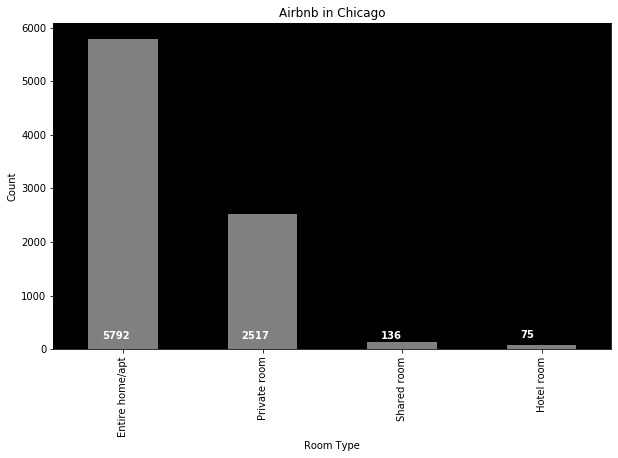

In [117]:
roomtype_group = df.room_type.value_counts()
ax = roomtype_group.plot(kind='bar', title='Airbnb in Chicago',color='grey', figsize=(10,6),fontsize=10)
ax.set(xlabel='Room Type', ylabel='Count', facecolor='black')
for i, v in enumerate(roomtype_group):
    ax.text(i-0.15, i+200 , str(v), color='white', fontweight='bold')

In [133]:
roomtype_group.sum()
for i,type in enumerate(roomtype_group):
    percentage = round(type*100/roomtype_group.sum(),2)
    print('There are {} {} which is {}% of all the Airbnb'.format(type, roomtype_group.index[i], percentage))

There are 5792 Entire home/apt which is 67.98% of all the Airbnb
There are 2517 Private room which is 29.54% of all the Airbnb
There are 136 Shared room which is 1.6% of all the Airbnb
There are 75 Hotel room which is 0.88% of all the Airbnb


In [ ]:
df['estimated_night'] = 